In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, SimpleRNN
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

# **Stock Price Prediction**

Given last 50 days of tesla price and S&P500, plot next five days of predicted tesla closing stock price, compare with actual. Show your results using comparative graphs as done for the flights data in example shared earlier.

In [ ]:
Tesla = web.DataReader('TSLA',data_source = 'yahoo', start = '2016-01-01', end = '2019-12-31') #Extract data from yahoo finance website for Tesla and S&P 500
SP500 = web.DataReader('^GSPC',data_source = 'yahoo', start = '2016-01-01', end = '2019-12-31')

#Check both lengths are same. If you pull data from different stock echanges, the length might be different depending on holidays
print(len(Tesla['Open']))
print(len(SP500['Open'])) 

#You may get any other  ticker by searching here https://finance.yahoo.com/quote/

1006
1006


In [ ]:
SP500

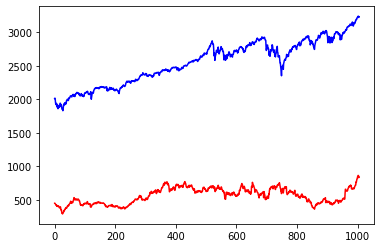

In [ ]:
L = len(Tesla['Open'])
All_Data = np.concatenate((np.array(Tesla['Open']).reshape(L,1), np.array(Tesla['Close']).reshape(L,1), 
                           np.array(Tesla['High']).reshape(L,1), np.array(Tesla['Low']).reshape(L,1), np.array(Tesla['Volume']).reshape(L,1),
                           np.array(SP500['Open']).reshape(L,1), np.array(SP500['Close']).reshape(L,1),
                          np.array(SP500['High']).reshape(L,1), np.array(SP500['Low']).reshape(L,1), np.array(SP500['Volume']).reshape(L,1),), axis = 1)
plt.plot(np.array(Tesla['Close'])*10, 'r')  #Displayed at 10 times the scale for better visualization
plt.plot(np.array(SP500['Close']), 'b')

Use sequences of 8 input arrays taken from All_Data. Each input will be of of length 50  (Last 50 days) and will be used to predict next five days. Try RNN, LSTM or GRU

In [ ]:
All_Data.shape

(1006, 10)

In [ ]:
Tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500,42.200001
...,...,...,...,...,...,...
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996


In [ ]:
# Remove Volume feature
features = [0,1,2,3,5,6,7,8]

prev_data = []  #Data of previous 50 days
pred_data = []  #Prediction for next 5 days

for i in range(0,All_Data.shape[0]-55):
      min = np.min(All_Data[i:i+50,features],axis = 0)
      max = np.max(All_Data[i:i+50,features],axis = 0)
      prev_data.append((All_Data[i:i+50,features]-min)/max)
      pred_data.append((All_Data[i+50:i+55,1]-min[1])/max[1])

# Convert list to numpy array
prev_data = np.array(prev_data)
pred_data = np.array(pred_data)

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(prev_data, pred_data, test_size=0.3)

In [ ]:
X_train.shape

(665, 50, 8)

In [ ]:
y_train.shape

(665, 5)

In [ ]:
X_test.shape

(286, 50, 8)

In [ ]:
y_test.shape

(286, 5)

RNN Model

In [ ]:
model = Sequential()
model.add(SimpleRNN((128),batch_input_shape = (None, 50,8), return_sequences = True))
model.add(SimpleRNN((64), activation = 'relu', return_sequences = True))
model.add(SimpleRNN((32), activation = 'relu', return_sequences = False))
model.add(Dense(5,activation = 'relu'))
model.compile(loss = 'mse',  optimizer = 'adam', metrics = ['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50, 128)           17536     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50, 64)            12352     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 33,157
Trainable params: 33,157
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 150, validation_data = (X_test, y_test))

Epoch 1/150
21/21 [==============================] - 1s 42ms/step - loss: 1.6827e-04 - mse: 1.6827e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2/150
21/21 [==============================] - 1s 43ms/step - loss: 1.6843e-04 - mse: 1.6843e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3/150
21/21 [==============================] - 1s 43ms/step - loss: 1.7822e-04 - mse: 1.7822e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/150
21/21 [==============================] - 1s 43ms/step - loss: 2.0046e-04 - mse: 2.0046e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/150
21/21 [==============================] - 1s 42ms/step - loss: 2.3020e-04 - mse: 2.3020e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/150
21/21 [==============================] - 1s 43ms/step - loss: 2.0905e-04 - mse: 2.0905e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/150
21/21 [==============================] - 1s 43ms/step - loss: 1.9364e-04 - mse: 1.9364e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/150
21/21 [=

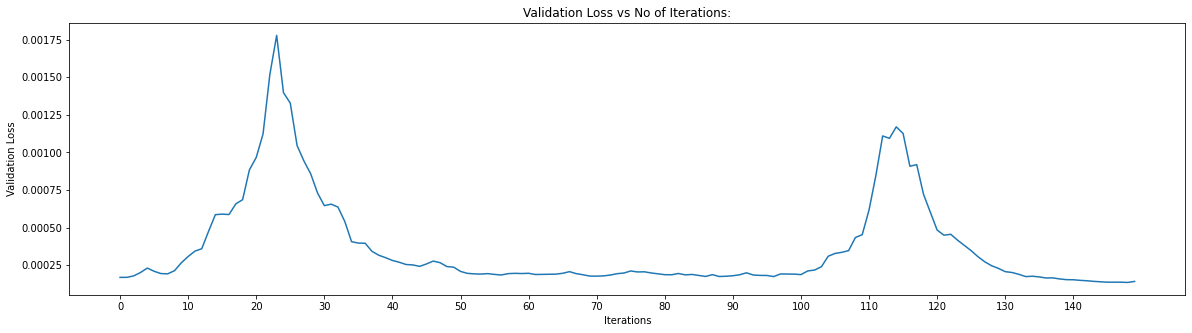

In [ ]:
# Plot loss vs iterations
plt.figure(None,(20,5))
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs No of Iterations:')
plt.xticks(np.arange(0, 150, 10))

plt.show()

Val loss is increasing after approx 90 epochs, hence set epochs to 90

In [ ]:
history = model.fit(X_train, y_train, epochs = 90, validation_data = (X_test, y_test))

Epoch 1/90
21/21 [==============================] - 1s 45ms/step - loss: 1.5203e-04 - mse: 1.5203e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2/90
21/21 [==============================] - 1s 42ms/step - loss: 1.6170e-04 - mse: 1.6170e-04 - val_loss: 9.8078e-04 - val_mse: 9.8078e-04
Epoch 3/90
21/21 [==============================] - 1s 41ms/step - loss: 1.5981e-04 - mse: 1.5981e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4/90
21/21 [==============================] - 1s 40ms/step - loss: 1.6524e-04 - mse: 1.6524e-04 - val_loss: 9.6731e-04 - val_mse: 9.6731e-04
Epoch 5/90
21/21 [==============================] - 1s 40ms/step - loss: 1.5646e-04 - mse: 1.5646e-04 - val_loss: 9.5055e-04 - val_mse: 9.5055e-04
Epoch 6/90
21/21 [==============================] - 1s 41ms/step - loss: 1.5819e-04 - mse: 1.5819e-04 - val_loss: 9.6518e-04 - val_mse: 9.6518e-04
Epoch 7/90
21/21 [==============================] - 1s 42ms/step - loss: 1.5359e-04 - mse: 1.5359e-04 - val_loss: 9.9276e-04 - val_mse

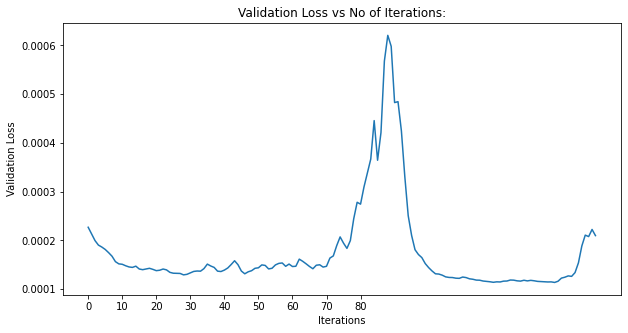

In [ ]:
# Plot loss vs iterations
plt.figure(None,(10,5))
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs No of Iterations:')
plt.xticks(np.arange(0, 90, 10))

plt.show()

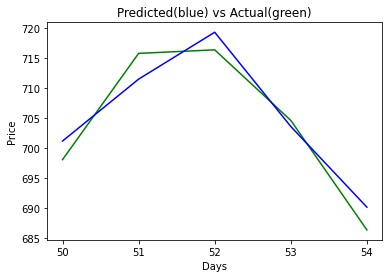

In [ ]:
#Plot of prediction vs actual values

data_Start_Point = 400
test_Data = All_Data[data_Start_Point:data_Start_Point+50,input];
min = np.min(test_Data,axis = 0);
max = np.max(test_Data,axis = 0);
actual_Target = All_Data[data_Start_Point+50:data_Start_Point+55,1];
results = model.predict((test_Data.reshape(1,50,8)-min)/max)
results = results.reshape(5)
results = results*max[1] + min[1];
plt.plot(range(50,55),results*10, 'g')
plt.plot(range(50,55),actual_Target*10, 'b')
plt.ylabel('Price')
plt.xlabel('Days')
plt.xticks(np.arange(50,55,1))
plt.title('Predicted(blue) vs Actual(green)')
plt.show()

Results show a decent predictability of the model

LSTM

In [ ]:
model = Sequential()
model.add(LSTM((128), batch_input_shape = (None, 50,8), return_sequences = True))
model.add(LSTM((64), activation = 'relu', return_sequences = True))
model.add(LSTM((32), activation = 'relu', return_sequences = False))
model.add(Dense(5,activation = 'relu'))
model.compile(loss = 'mse',  optimizer = 'adam', metrics = ['mse'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 128)           70144     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50, 64)            49408     
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 165       
Total params: 132,133
Trainable params: 132,133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 150, validation_data = (X_test, y_test))

Epoch 1/150
21/21 [==============================] - 1s 43ms/step - loss: 2.2688e-04 - mse: 2.2688e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/150
21/21 [==============================] - 1s 41ms/step - loss: 2.1318e-04 - mse: 2.1318e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/150
21/21 [==============================] - 1s 40ms/step - loss: 1.9956e-04 - mse: 1.9956e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/150
21/21 [==============================] - 1s 41ms/step - loss: 1.9030e-04 - mse: 1.9030e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 5/150
21/21 [==============================] - 1s 39ms/step - loss: 1.8629e-04 - mse: 1.8629e-04 - val_loss: 9.7132e-04 - val_mse: 9.7132e-04
Epoch 6/150
21/21 [==============================] - 1s 41ms/step - loss: 1.8137e-04 - mse: 1.8137e-04 - val_loss: 9.7463e-04 - val_mse: 9.7463e-04
Epoch 7/150
21/21 [==============================] - 1s 40ms/step - loss: 1.7477e-04 - mse: 1.7477e-04 - val_loss: 9.8408e-04 - val_mse: 9.8408e

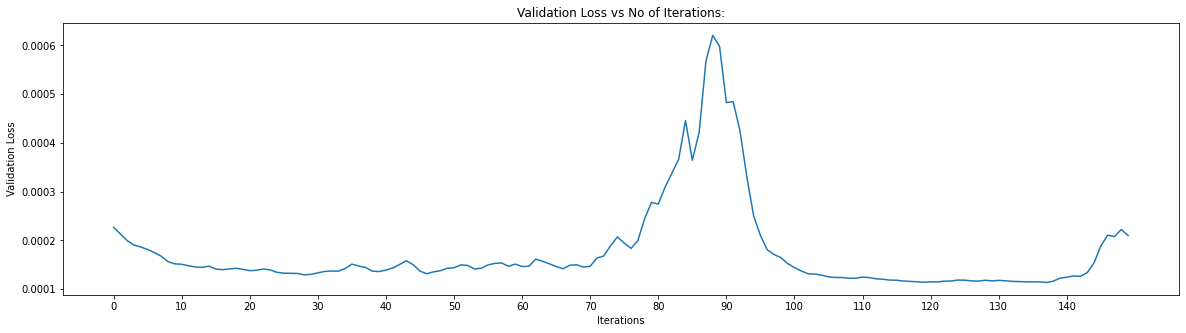

In [ ]:
# Plot loss vs iterations
plt.figure(None,(20,5))
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs No of Iterations:')
plt.xticks(np.arange(0, 150, 10))

plt.show()

In [ ]:
data_Start_Point = 200
test_Data = All_Data[data_Start_Point:data_Start_Point+50,input];
min = np.min(test_Data,axis = 0);
max = np.max(test_Data,axis = 0);
actual_Target = All_Data[data_Start_Point+50:data_Start_Point+55,1];
results = model.predict((test_Data.reshape(1,50,8)-min)/max)
results = results.reshape(5)
results = results*max[1] + min[1];
plt.plot(range(50,55),results*10, 'g')
plt.plot(range(50,55),actual_Target*10, 'b')
plt.ylabel('Price')
plt.xlabel('Days')
plt.xticks(np.arange(50,55,1))
plt.title('Predicted(blue) vs Actual(green)')
plt.show()

IndexError: ignored

there's a syntax error